<a href="https://colab.research.google.com/github/franjgs/LabelSwitching/blob/main/Asymmetric_Label_Switching.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Imbalance datasets 
High imbalance occurs in many real-world application areas where the decision system is aimed to detect rare but important cases. Simply by listing some of them, data imbalance is found in the Information Technology area, in biomedical data, industrial applications, or in the financial area.

The imbalance implies a difficulty for learning algorithms, since they will be biased towards the most frequent cases. To overcome such bias to majority samples, specific machine learning algorithms must be applied. This domain is known as learning from imbalanced data [[he2009learning](https://doi.org/10.1109/TKDE.2008.239)], [[fernandez2018learning](https://link.springer.com/book/10.1007/978-3-319-98074-4)].

 The approaches to dealing with imbalanced datasets are usually sorted
 into three categories: 

1.   Data-level methods concentrate on modifying the training set to make it 
 suitable for a standard learning algorithm; balancing distributions by 
 creating new objects for minority classes (oversampling and variations 
 such as SMOTE [[chawla2002smote](https://doi.org/10.1613/jair.953)] and its different modifications, or removing examples from majority classes 
 (undersampling belong to this category).
2. Algorithm-level methods modify existing learning algorithms to 
 alleviate the bias towards majority examples; cost-sensitive approaches 
 [[lopez2012analysis](https://doi.org/10.1016/j.eswa.2011.12.043)], which assume higher misclassification
 costs for samples in the minority class fall in this category. 
3. Ensemble learning [[rokach2010ensemble](https://link.springer.com/article/10.1007/s10462-009-9124-7)] [[polikar2012ensemble](https://link.springer.com/chapter/10.1007/978-1-4419-9326-7_1)]
is a multi-learner paradigm in which several models, or base learners,
are trained using diverse examples, and their complementary (or
uncorrelated) predictions are fused to yield a final decision.

# Ensembles

Machine ensembles allow to improve the performance of single learning
machines by aggregating the outputs of a number of them -learning units or
learners- that are trained under diverse conditions. Since the 1990s,
they served, in particular, to alleviate the practical limitations that the size
of training datasets impose to the approximation capacity of shallow Multi-
Layer Perceptrons (MLPs).

## Diversity

Ensemble diversity can be introduced in different ways: using bootstrap samples 
from the training data [[breiman1996bagging](https://link.springer.com/article/10.1007/BF00058655)]  modifying the empirical 
distribution of the data (either by resampling or re-weighting examples), 
manipulating the input features, or altering 
the output targets, or class labels.

#### Bagging

Bagging type diversifications (resampling) introduce some risks (deletion of critical samples, emphasis of outliers), which may create distortions in the class likelihoods.

#### Label Switching

Class-switching ensembles get diversity by randomly modifying the
class label of a fraction of instances of the training set
[[breiman2000randomizing](https://link.springer.com/content/pdf/10.1023/A:1007682208299.pdf)]. This simple yet effective 
technique improves the classification accuracy of neural
network ensembles outperforming bagging and boosting in some common
imbalanced scenarios [[martinez2005switching](https://doi.org/10.1016/j.patcog.2005.02.020)].

#Asymmetric Label Switching

As it was mentioned above, class-label switching improves the classification accuracy of neural network ensembles outperforming bagging and boosting in some common imbalanced scenarios. 

An obvious question that may arise is whether the diversity on majority and minority class should be equal or different. Our answer is to use asymmetric label-switching [[gutierrez2020asymmetric](https://doi.org/10.1016/j.inffus.2020.02.004)].

## Principle-based decision using Assymetric Label Switching
Bayes theory establishes that the minimization of the average
classification cost in a binary problem leads to the LR Test (LRT)
[[van2001detection](https://onlinelibrary.wiley.com/doi/book/10.1002/0471221082)]:

\begin{equation}
	q (\mathbf{x}) = \frac{p(\mathbf{x} | C_1)}{p(\mathbf{x} | C_0)}
	\underset{C_0}{\overset{C_1}{\gtrless}}
	\frac{c_{10}-c_{00}}{c_{01}-c_{11}} \frac{P_0}{P_1} = Q_{C}
	Q_{P}=Q \label{eq:2.1}
\end{equation}

where $\mathbf{x}$ is the observed sample, $\left\{C_0, C_1\right\}$ ($\equiv \left\{-1, +1 \right\}$) the
classes (we assume that $C_1$ is the minority class),  $p(\mathbf{x} | C_i)$ the class $C_i$ likelihood, $c_{ji}$ the
cost of attributing a class $C_i$ sample to class $C_j$, $P_i$ the *a
priori* probability of the class $C_i$, $Q_C= [c_{10} - c_{00}]/[c_{01} - c_{11}]$, and $Q_P=P_0/P_1$ (or, equivalently, the Imbalance Ratio, IR). 


The application of a random label switching with rates $\alpha$ and $\beta$
to the $C_0$ and $C_1$ samples, respectively, and $\alpha > \beta$, results in a new and more balanced classification problem $S$, which will have *classes* 
$C_{1}^{\prime}$ and $C_{0}^{\prime}$. 

The new *class* probabilities will be given by
\begin{equation}
\mbox{Pr}_S (C_{1}^{\prime} | \mathbf{x})  = \frac{p(\mathbf{x} |
	C_1)( 1-\beta ) P_1 + p(\mathbf{x}|C_0) \alpha P_0}{p(\mathbf{x}|C_1)P_1 +
	p(\mathbf{x}|C_0)P_0} 
\label{eq:3.2}
\end{equation}

By adding and subtracting 
$\alpha p(\mathbf{x}|C_1)P_1$ to the numerator of the previous equation, we obtain
\begin{equation}
\mbox{Pr}_S (C_{1}^{\prime} | \mathbf{x}) = (1-\alpha-\beta) \mbox{Pr}
(C_{1} | \mathbf{x}) + \alpha
\label{eq:3.3}
\end{equation}
from which
\begin{equation}
\mbox{Pr} (C_{1} | \mathbf{x})=\frac{\mbox{Pr}_S (C_{1}^{\prime} |
	\mathbf{x})-\alpha}{1-\alpha-\beta}
\label{eq:3.4}
\end{equation}
i.e., we can recover (an estimate of) $\mbox{Pr} (C_{1} | \mathbf{x})$ from
(an estimate of) $\mbox{Pr}_S (C_{1}^{\prime} | \mathbf{x})$. 

The use of Bregman divergences [[bregman1967relaxatio](https://doi.org/10.1016/0041-5553(67)90040-7)] provides an
	estimate of the *a posteriori* statistical mean of $y$. For binary classification with $y_{n} = \pm 1$, and a discriminative machine trained with a Bregman Loss Function and label switching, the machine's output is:
  \begin{equation}
		o_S(\mathbf{x}) = \mbox{E}_S (y | \mathbf{x}) =
		\mbox{P}\mbox{r}_S(C_1^\prime | \mathbf{x})-\mbox{P}\mbox{r}_S(C_0^\prime |
		\mathbf{x}) = 2 \mbox{P}\mbox{r}_S(C_1^\prime | \mathbf{x})-1
		\label{eq:2.4}
	\end{equation}
	and the *a priori* probability of the new minority class $C_1^\prime$
	\begin{equation}
	    \mbox{P}\mbox{r}_S(C_1^\prime | \mathbf{x})=\left[ o_S(\mathbf{x})+1 
		\right]/2 \label{eq:2.5}
  \end{equation}

Now, we can obtain an alternative expression for the LRT, derived by applying Bayes' rule and simple mathematical transformations, such as:
\begin{equation}
o_S(\mathbf{x}) \underset{C_0}{\overset{C_1}{\gtrless}} 2 \left[ \alpha + (1-\alpha-\beta) \frac{Q}{Q+Q_P} \right]-1 = \eta_{S}
\label{eq:3.9}
\end{equation}

# Code for Assymetric Label Switching

## Load some standard packages

In [1]:
import numpy as np
import pandas as pd

import time
import scipy.io as sio
from scipy.interpolate import interp1d

import matplotlib.pyplot as plt

## Performace Metrics

In [2]:
from sklearn import metrics
from sklearn.metrics import f1_score, roc_curve, auc, roc_auc_score
from sklearn.preprocessing import StandardScaler

def perf_measure(y_actual, y_hat):

    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)):
        if y_actual[i]==y_hat[i]:
            if y_actual[i]==1:
                TP += 1
            else:
                TN += 1
        else:
            if y_actual[i]==1:
                FN += 1
            else:
                FP += 1

    return TP, FP, TN, FN

def ROC_points(L, f):

  """
  Calculates the value of the discriminant function for a dx1 dimensional
  sample given covariance matrix and mean vector.
  """

  FPR=[]
  TPR=[]
  P=len(np.where(L==+1)[0])
  N=len(np.where(L==-1)[0])

  B=sorted(range(len(f)),key=lambda x:f[x],reverse=True)

  L_sorted=L[B]
  FP=0
  TP=0
  f_prev=1e45
  i=0

  while i < len(L_sorted):
      if f[i] !=f_prev:
          FPR.append(FP/float(N))
          TPR.append(TP/float(P))
          f_prev=f[i]
      if L_sorted[i]==+1:
          TP+=1
      else:
          FP+=1
      i+=1

  FPR.append(FP/float(N))
  TPR.append(TP/float(P))

  return FPR, TPR

## Base Learners

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier, MLPRegressor

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.ensemble import RandomForestClassifier, VotingClassifier, GradientBoostingClassifier, AdaBoostClassifier

nh = 4
MLPr = MLPRegressor(solver='lbfgs', alpha = 0.1, activation = 'tanh', hidden_layer_sizes=(nh, ), max_iter=750) #, random_state=1)
MLPc = MLPClassifier(solver='lbfgs', alpha = 0.1, activation = 'tanh', hidden_layer_sizes=(nh, ), max_iter=750) #, random_state=1)

classifiers = [
    KNeighborsClassifier(3),                                # 0. Accepatble performance 
    SVC(kernel="linear", C=0.025, probability=True),        # 1. Very Bad performance. Very Slow (5-fold validation to estimate pyX)
    SVC(gamma=2, C=1, probability=True),                    # 2. Very Bad performance. Very Slow (5-fold validation to estimate pyX)
    GaussianProcessClassifier(1.0 * RBF(1.0)),              # 3. Very very Slow
    DecisionTreeClassifier(max_depth=5),                    # 4. Accepatble performance 
    RandomForestClassifier(max_depth=5, n_estimators=3),    # 5. Bad Performace  max_features=1),
    GradientBoostingClassifier(n_estimators = 3),           # 6. Very Bad performance
    AdaBoostClassifier(n_estimators = 3, base_estimator = GaussianNB(), learning_rate=1),   # 7. Bad performance
    GaussianNB(),                                           # 8. Medium Performace. Very Fast
    QuadraticDiscriminantAnalysis(),                        # 9.  Accepatble performance. Very fast. Fails at execution
    MLPc,                                                   # 10. Best Performace. Slow convergence.
    MLPr
    ]

K_ens= [31] # Number of learners in the ensemble
learner_ens = classifiers[10] # MLPc

## Population Rebalancing methods

In [4]:
from imblearn.over_sampling import RandomOverSampler, SMOTE, BorderlineSMOTE, KMeansSMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids, RandomUnderSampler, NearMiss

RB_method = {
    'RandomOverSampler': RandomOverSampler,
    'SMOTE': SMOTE,
    'BorderlineSMOTE': BorderlineSMOTE, 
    'KMeansSMOTE': KMeansSMOTE, 
    'ADASYN': ADASYN,
    'ClusterCentroids': ClusterCentroids, 
    'RandomUnderSampler': RandomUnderSampler, 
    'NearMiss': NearMiss
    }
rb_method = list(RB_method.keys())[1]  # SMOTE

## Label Switching

Conventional (Symmetric) Switching 

In [5]:
def breiman_switching(y, frsw=0.0):

    # frsw: Label Switching Rate from Minority to Majority class

    ysw=1*y;

    idx1=np.where(y==+1)[0]
    idx0=np.where(y==-1)[0]

    n_flipped=int(round(len(idx1)*frsw))

    idx1_sw=np.random.choice(idx1, n_flipped, replace=False)
    ysw[idx1_sw]=-y[idx1_sw]

    idx0_sw=np.random.choice(idx0, n_flipped, replace=False)
    ysw[idx0_sw]=-y[idx0_sw]

    return ysw

Asymmetric Label Switching

In [6]:
def label_switching(y, alphasw=0.0, betasw=0.0):

    # alphasw: Label Switching Rate from Majority to Minority class
    # betasw: Label Switching Rate from Minority to Majority class

    ysw=1*y;

    idx1=np.where(y==+1)[0]
    l1=len(idx1)
    bet_1=int(round(l1*betasw))
    idx1_sw=np.random.choice(idx1,bet_1, replace=False)
    ysw[idx1_sw]=-y[idx1_sw]

    idx0=np.where(y==-1)[0]
    l0=len(idx0)
    alph_0=int(round(l0*alphasw))
    idx0_sw=np.random.choice(idx0,alph_0, replace=False)
    ysw[idx0_sw]=-y[idx0_sw]

    return ysw

## Load UCI Datasets

Load the dataset via its URL and check the following:

- Are the headers showing up properly?
- Look at the first 5 and the last 5 rows, do they seem to be in order?
- Does the dataset have the correct number of rows and columns as described in the UCI page? 
 - Remember, that UCI does not count the y variable (column of values that we might want to predict via a machine learning model) as an "attribute" but rather as a "class attribute" so you may end up seeing a number of columns that is one greater than the number listed on the UCI website.
- Does UCI list this dataset as having missing values? Check for missing values and see if your analysis corroborates what UCI reports?
- if `NaN` values or other missing value indicators are not being detected by `df.isnull().sum()` find a way to replace whatever is indicating the missing values with `np.NaN`.
- Use the .describe() function in order to see the summary statistics of both the numeric and non-numeric columns. 

In [8]:
# Load data from URL using pandas read_csv method
filename_i='balance-scale'
URL_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'+filename_i+'/'+filename_i+'.data'
# print(URL_path)
Xy = pd.read_csv(URL_path)
di = {'L': -1, 'B': +1, 'R': -1}
Xy.replace({'B': di}, inplace=True)
y = np.array(Xy['B'])
X = np.array(Xy.drop(['B'], axis=1))

In [25]:

filename_i='wine-quality'

URL_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/'+filename_i+'/winequality-red.csv'
# print(URL_path)
Xy = pd.read_csv(URL_path,  sep=';')

Xy['quality'] = Xy['quality'].apply(lambda x: +1 if x <= 4 else -1)
y = np.array(Xy['quality'])
X = np.array(Xy.drop(['quality'], axis=1))


In [26]:
dim = X.shape[1]

N0 = len(np.where(y==-1)[0])
N1 = len(np.where(y==1)[0])

IR = N0/N1

index0 = np.where(y==-1)[0]
index1 = np.where(y==1)[0]

print('N0: %d. N1: %d. IR = %.2f' % (N0 , N1, IR))

N0: 1536. N1: 63. IR = 24.38


In [27]:
######## Costes y Probabilidades ########
P0=float(N0)/float(N0+N1)
P1=float(N1)/float(N0+N1)
QP=P0/P1

P0_1=0.5 # Para la balanced accuracy
P1_1=0.5

C10=1 # False Positive (FP)
C00=0 # True Negative (TN)
C01=5 # False Negative (FN)   : QC=1/5
C11=0 # True Positive (TP)

QC=float(C10-C00)/float(C01-C11)
QCT=QC

Q=QC*QP
######## Costes y Probabilidades ########

# Rebalance

Q_RB_S = np.min((16, IR-1)) # Population
Q_RB_C = [0]                # Cost

if Q_RB_S == 0:
    RB = Q_RB_C
else:
    RB = Q_RB_S

rb = RB

## Common Parameters

In [28]:
###################### COMMON PARAMETERS ######################

n_folds = 1
Nruns   = 20
Test_size = 25

index0 = np.where(y==-1)[0]
index1 = np.where(y==1)[0]

l_test0 = int(N0*0.01*Test_size)
l_test1 = int(N1*0.01*Test_size)

Alpha = [0, 0.1, 0.2, 0.3, 0.4] # Label Switching Rate from Majority to Minority class    
Beta = [0] # Label Switching Rate from Minority to Majority class
eps=np.finfo(float).eps

In [29]:
filename_o=filename_i+'_NW_nh_'+str(nh)+'_TS_'+str(Test_size)+'.mat'

perf_sw_K1 = np.zeros([Nruns, len(Alpha), len(Beta), len(K_ens), 8]) # Confusion Matrix + MCC + F1 + G-Mean
perf_sw_K2 = np.zeros([Nruns, len(Alpha), len(Beta), len(K_ens)])   # CBL
perf_sw_K3 = np.zeros([Nruns, len(Alpha), len(Beta), len(K_ens)])   # AuC

lROC=1001
mean_fpr = np.logspace(-4, 0, lROC)
perf_sw_K4=np.zeros([len(Alpha), len(Beta), len(K_ens), lROC, 2])     # Test:  ROC(FPR, TPR)
 

## Main Loop


In [ ]:
b_idx=0
for beta in Beta:
    a_idx=0
    for alpha in Alpha:        
        start = time.time()
        for nruns in range(Nruns):
            
            idx0_test = np.random.choice(index0, l_test0, replace=False)
            idx1_test = np.random.choice(index1, l_test1, replace=False)
            idx_test = np.sort(np.concatenate((idx0_test, idx1_test), axis=0))

            X_train = np.delete(X, idx_test, axis=0)
            X_test = X[idx_test]
            y_train = np.delete(y, idx_test, axis=0)
            y_test = y[idx_test]
                         
            N0_tr = len(np.where(y_train==-1)[0])
            N1_tr = len(np.where(y_train==1)[0])

            P0_tr = float(N0_tr)/float(N0_tr+N1_tr)
            P1_tr = float(N1_tr)/float(N0_tr+N1_tr)
            
            QP_tr = P0_tr/P1_tr

            y_true = y_test

            k_idx = 0
            for K in K_ens:

                o_x=np.ones([len(y_test)])

                o_x_tst_ens=np.zeros([K,len(y_test)])

                model_name=model_name = type(learner_ens).__name__                
                MLP_ens = [learner_ens for kkk in range(K)]

                for k in range(K):              
                    #################### NORM ####################
                    scaler = StandardScaler()
                    scaler.fit(X_train)
                    X_train_n = scaler.transform(X_train)
                    y_train_n = y_train
                    X_test_n = scaler.transform(X_test)
                    #################### NORM ####################

                    ################### Rebalance ################
                    if Q_RB_S==0 or Q_RB_S==[0]:
                      ind_ord = np.arange(len(y_train_n))
                      ind_rnd = np.random.choice(ind_ord, size=len(y_train_n), replace=False)
                      X_train_SM, y_train_SM = X_train_n[ind_rnd,:], y_train_n[ind_rnd]
                    else:
                      # print("SMOTE")
                      X_train_SMa, y_train_SMa = RB_method[rb_method](sampling_strategy=1/rb).fit_resample(X_train_n, y_train_n)
                      ind_ord = np.arange(len(y_train_SMa))
                      ind_rnd = np.random.choice(ind_ord, size=len(y_train_SMa), replace=False)
                      X_train_SM, y_train_SM = X_train_SMa[ind_rnd,:], y_train_SMa[ind_rnd]
                    
                    ################## Switching ##################
                    if alpha==0 and beta==0:
                        X_train_s, y_train_s = X_train_SM, y_train_SM
                    else:
                        X_train_s = X_train_SM
                        y_train_s = label_switching(y_train_SM, alpha, beta)
                    
                    
                    N0_sw = len(np.where(y_train_s==-1)[0])
                    N1_sw = len(np.where(y_train_s==1)[0])

                    P0_sw = float(N0_sw)/float(N0_sw+N1_sw)
                    P1_sw = float(N1_sw)/float(N0_sw+N1_sw)

                    QP_sw = P0_sw/P1_sw
                    ################## Switching #################
                    MLP_ens[k] = MLP_ens[k].fit(X_train_s, y_train_s)
 
                    y_pred = MLP_ens[k].predict_proba(X_test_n)[:,1]*2-1
                    
                    o_x_tst_ens[k] = y_pred
                    
                o_x_tst=o_x_tst_ens.mean(0)
                pyX_test=(0.5*(o_x_tst+1)-alpha)/(1-alpha-beta)
                
                FPR_vec, TPR_vec, thresholds = roc_curve(y_true, pyX_test)
                roc_auc = auc(FPR_vec, TPR_vec)
                perf_sw_K3[nruns,a_idx,b_idx, k_idx] = roc_auc

                f_ROC = interp1d(FPR_vec, TPR_vec)

                perf_sw_K4[a_idx,b_idx,k_idx,:,0] += mean_fpr
                perf_sw_K4[a_idx,b_idx,k_idx,:,1] += f_ROC(mean_fpr)

                if rb == 0: # No rebalance. Only SW (No RB)
                  gamma = (2 * (alpha + (1 - alpha - beta) * (QCT / (QCT + 1))) - 1)
                else: # Rebalance
                  gamma = (2 * (alpha + (1 - alpha - beta) * (QCT / (QCT + (rb/QP_tr)))) - 1) 
 
                o_x2=np.ones([len(y_test)])
                o_x2[o_x_tst < gamma] = -1

                TP, FP, TN, FN = perf_measure(y_true, o_x2) 

                # Sensitivity, hit rate, recall, or true positive rate
                TPR=TP/float(TP+FN)

                # Specificity (SPC) or true negative rate
                SPC=TN/float(TN+FP)

                # False positive rate: FPR=FP/float(FP+TN) = 1-SPC
                FPR=1-SPC

                # False negative rate
                FNR=1-TPR

                # Mathhews correlation coefficient
                if (((TP + FP) == 0) or ((TP + FN) == 0) or ((TN + FP) == 0) or ((TN + FN) == 0)):
                    MCC = 0
                else:
                    MCC = (TP * TN - FP * FN) / np.sqrt(float(TP + FP) * float(TP + FN) * float(TN + FP) * float(TN + FN))

                # Accuracy
                ACC=(TP+TN)/float(TP+FN+FP+TN)

                # F1 Score
                F1=2*TP/float(2*TP+FP+FN)

                perf_sw_K1[nruns,a_idx,b_idx,k_idx,0]=FPR
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,1]=TPR
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,2]=SPC
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,3]=ACC
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,4]=MCC
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,5]=F1
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,6]= TP/float(TP+FP) # Precision
                perf_sw_K1[nruns,a_idx,b_idx,k_idx,7]= np.sqrt((TP/float(TP+FP))*TPR) # G-Mean

                perf_sw_K2[nruns,a_idx,b_idx,k_idx]=(FPR*P0_1+FNR*P1_1) # Balanced Accuracy

                k_idx+=1

        end = time.time()
        print('TRAIN TIME:')
        print('%.2gs'%(end-start))
        print('Alpha: %.2f. Beta: %.2f. IR_sw: %.2f.'  %(alpha,beta,QP_sw))

        
        for k_idx in range(len(K_ens)):
            print('MLP: %d. F1: %f. +- %f MCC: %f. +- %f TPR: %f. FPR: %f' %(K_ens[k_idx],
                                                                             np.mean(perf_sw_K1[:,a_idx,b_idx,k_idx,5]), 
                                                                             np.std(perf_sw_K1[:,a_idx,b_idx,k_idx,5]), 
                                                                             np.mean(perf_sw_K1[:,a_idx,b_idx,k_idx,4]), 
                                                                             np.std(perf_sw_K1[:,a_idx,b_idx,k_idx,4]), 
                                                                             np.mean(perf_sw_K1[:,a_idx,b_idx,k_idx,1]), 
                                                                             np.mean(perf_sw_K1[:,a_idx,b_idx,k_idx,0])))
        a_idx+=1
    b_idx+=1


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


## Final Results

In [22]:
perf_sw_K1_std = np.std(perf_sw_K1, axis=0)
perf_sw_K1 = np.mean(perf_sw_K1, axis=0)

perf_sw_K2_std = np.std(perf_sw_K2, axis=0)
perf_sw_K2 = np.mean(perf_sw_K2, axis=0)

perf_sw_K3_std = np.std(perf_sw_K3, axis=0)
perf_sw_K3 = np.mean(perf_sw_K3, axis=0)

perf_sw_K4 /= n_folds*Nruns


### Graphical Representation

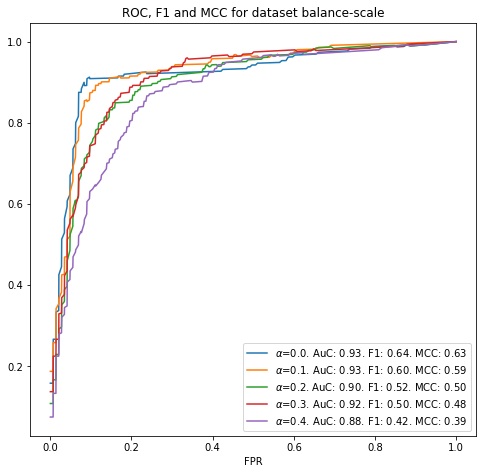

In [24]:
b_idx = 0 # Beta[0]
for k_idx in range(len(K_ens)):
  tprPoints = perf_sw_K4[:,b_idx,k_idx,:,0]
  fprPoints = perf_sw_K4[:,b_idx,k_idx,:,1]
  plt.plot(tprPoints[0,:],fprPoints[0,:], label=r'$\alpha$=%.1f. AuC: %.2f. F1: %.2f. MCC: %.2f' % (Alpha[0], perf_sw_K3[0,0,0], perf_sw_K1[0,0,0,5], perf_sw_K1[0,0,0,4]))
  plt.plot(tprPoints[1,:],fprPoints[1,:], label=r'$\alpha$=%.1f. AuC: %.2f. F1: %.2f. MCC: %.2f' % (Alpha[1], perf_sw_K3[1,0,0], perf_sw_K1[1,0,0,5], perf_sw_K1[1,0,0,4]))
  plt.plot(tprPoints[2,:],fprPoints[2,:], label=r'$\alpha$=%.1f. AuC: %.2f. F1: %.2f. MCC: %.2f' % (Alpha[2], perf_sw_K3[2,0,0], perf_sw_K1[2,0,0,5], perf_sw_K1[2,0,0,4]))
  plt.plot(tprPoints[3,:],fprPoints[3,:], label=r'$\alpha$=%.1f. AuC: %.2f. F1: %.2f. MCC: %.2f' % (Alpha[3], perf_sw_K3[3,0,0], perf_sw_K1[3,0,0,5], perf_sw_K1[3,0,0,4]))
  plt.plot(tprPoints[4,:],fprPoints[4,:], label=r'$\alpha$=%.1f. AuC: %.2f. F1: %.2f. MCC: %.2f' % (Alpha[4], perf_sw_K3[4,0,0], perf_sw_K1[4,0,0,5], perf_sw_K1[4,0,0,4]))
  plt.xlabel('TPR')
  plt.xlabel('FPR')
  plt.legend()
  plt.title('ROC, F1 and MCC for dataset '+filename_i);
  plt.gca().set_aspect('equal', adjustable='box')
  plt.rcParams["figure.figsize"] = (15,15)
  plt.show()

sio.savemat(model_name+'_'+filename_o, {'perf_sw_K1': perf_sw_K1,  
                                        'perf_sw_K2': perf_sw_K2, 
                                        'perf_sw_K3': perf_sw_K3, 
                                        'perf_sw_K1_std': perf_sw_K1_std,  
                                        'perf_sw_K2_std': perf_sw_K2_std, 
                                        'perf_sw_K3_std': perf_sw_K3_std, 
                                        'perf_sw_K4': perf_sw_K4, 
                                        'Alpha': Alpha, 'Beta': Beta, 'K_ens': K_ens})